# Лабораторная работа №2

> Разработка и исследование «темпорального процессора» для информационно-аналитических систем

1. Рассмотрение теоретической части задания;
2. Проектирование общей структуры редактора;
3. Разработка алгоритмов создания и редактирования переменных;
4. Разработка алгоритмов анализа выполнения требований к виду функций принадлежности;
5. Выполнение чертежей (эскизов) экранных форм;
6. Написание и отладка программы редактора;
7. Создание тестовых баз знаний с лингвистическими переменными;
8. Анализ удобства редактирования и корректности представления переменных в базе знаний;
9. Выполнение отчетных материалов.

## Создание и редактирование лингвистических переменных

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Параметры
ling_var_name = "Speed"  # Имя лингвистической переменной
num_terms = 5  # Количество термов
term_names = ["Very slow", "Slow", "Medium", "Fast", "Very fast"]  # Имена термов
max_scale_value = 100  # Максимальное значение предметной шкалы

# Точки предметной шкалы с нулевыми и единичными значениями функций принадлежности для каждого терма
zero_one_points = [
    (None, None, 10, 20),  # Для "Very slow"
    (10, 20, 30, 40),  # Для "Slow"
    (30, 40, 50, 60),  # Для "Medium"
    (50, 60, 70, 80),  # Для "Fast"
    (70, 80, None, None)  # Для "Very fast"
]

## Создание линейного пространства для построения графика

In [27]:
x = np.linspace(start=0, stop=max_scale_value, num=(num_terms * 100))

## Создание функций принадлежности

Для начала создадим объект графика, после чего добавим на него функции принадлежности
для каждого терма и обновим легенду.

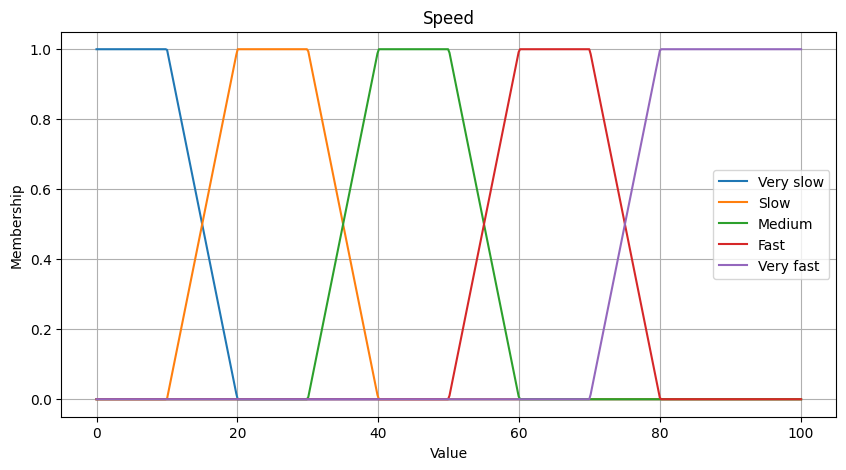

In [28]:
plt.figure(figsize=(10, 5))
plt.title(ling_var_name)
plt.ylabel("Membership")
plt.xlabel("Value")
plt.grid(True)
for term_name, points in zip(term_names, zero_one_points):
    # Сконвертировать каждую None в соответствующий край предметной шкалы
    points = [0 if point is None and i < 2 else max_scale_value if point is None else point for i, point in enumerate(points)]
    membership_function = fuzz.trapmf(x, points)
    plt.plot(x, membership_function, label=term_name)
    # Обновим легенду
    plt.legend()